**Tugas GANs**  
<br>
<ul style="list-style-type:none;">
    <li>Nama: Rachmat Dwi Putra </li>
    <li>NIM : 1301180201 </li>
</ul>

# Contoh Code Materi GANs

## Load Dataset dan Data Pre-processing

In [1]:
import tensorflow as tf
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = (x_train.astype('float32') - 127.5) / 127.5  # Normalisasi data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

## Membangun Generator

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv2DTranspose

def build_generator():
    model = Sequential()
    model.add(Dense(128, input_dim=100, activation='relu'))
    model.add(Dense(784, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model
generator = build_generator()

## Membangun Discriminator

In [3]:
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.models import Sequential

def build_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Membangun Model GAN

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

discriminator.trainable = False
gan_input = Input(shape=(100,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)

gan = Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')

## Melatih Model GAN

In [5]:
import numpy as np

def train_gan(gan, generator, discriminator, data, epochs=10000, batch_size=128):
    for epoch in range(epochs):
        noise = np.random.normal(0, 1, (batch_size, 100))
        generated_images = generator.predict(noise)

        idx = np.random.randint(0, data.shape[0], batch_size)
        real_images = data[idx]

        # Label
        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))

        # Train discriminator
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(generated_images, fake_labels)

        # Train generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, real_labels)

        if epoch % 1000 == 0:
            print("iterasi epoch % 1000 == 0 ke-", epoch)
            print(f"Epoch: {epoch}, D Loss: {d_loss_real[0] + d_loss_fake[0]}, G Loss: {g_loss}")

train_gan(gan, generator, discriminator, x_train)

4/4 [==============================] - 0s 7ms/step
iterasi epoch % 1000 == 0 ke- 0
Epoch: 0, D Loss: 1.0417506396770477, G Loss: 0.9549839496612549
4/4 [==============================] - 0s 4ms/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 7ms/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 3ms/step
iterasi epoch % 1000 == 0 ke- 1000
Epoch: 1000, D Loss: 0.0479666106402874, G Loss: 5.009398460388184
4/4 [==============================] - 0s 8ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 7ms/step


4/4 [==============================] - 0s 7ms/step


4/4 [==============================] - 0s 4ms/step


4/4 [==============================] - 0s 8ms/step


4/4 [==============================] - 0s 6ms/step
iterasi epoch % 1000 == 0 ke- 2000
Epoch: 2000, D Loss: 0.6927435323596001, G Loss: 3.949564218521118
4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 7ms/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 8ms/step


4/4 [==============================] - 0s 7ms/step


4/4 [==============================] - 0s 4ms/step
iterasi epoch % 1000 == 0 ke- 3000
Epoch: 3000, D Loss: 0.16855039075016975, G Loss: 5.278071403503418
4/4 [==============================] - 0s 8ms/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 4ms/step


4/4 [==============================] - 0s 8ms/step


4/4 [==============================] - 0s 4ms/step


4/4 [==============================] - 0s 8ms/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 4ms/step
iterasi epoch % 1000 == 0 ke- 4000
Epoch: 4000, D Loss: 0.4136454463005066, G Loss: 5.877786636352539
4/4 [==============================] - 0s 8ms/step


4/4 [==============================] - 0s 4ms/step


4/4 [==============================] - 0s 4ms/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 8ms/step


4/4 [==============================] - 0s 7ms/step


4/4 [==============================] - 0s 4ms/step
iterasi epoch % 1000 == 0 ke- 5000
Epoch: 5000, D Loss: 0.4337428957223892, G Loss: 5.47370719909668
4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 7ms/step


4/4 [==============================] - 0s 4ms/step


4/4 [==============================] - 0s 6ms/step
iterasi epoch % 1000 == 0 ke- 6000
Epoch: 6000, D Loss: 0.5307102799415588, G Loss: 4.7155890464782715
4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 7ms/step


4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 4ms/step


4/4 [==============================] - 0s 4ms/step


4/4 [==============================] - 0s 8ms/step
iterasi epoch % 1000 == 0 ke- 7000
Epoch: 7000, D Loss: 0.5020595788955688, G Loss: 4.264481544494629
4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 8ms/step


4/4 [==============================] - 0s 7ms/step


4/4 [==============================] - 0s 9ms/step


4/4 [==============================] - 0s 4ms/step


4/4 [==============================] - 0s 8ms/step


4/4 [==============================] - 0s 3ms/step
iterasi epoch % 1000 == 0 ke- 8000
Epoch: 8000, D Loss: 0.5652564615011215, G Loss: 4.466912269592285
4/4 [==============================] - 0s 8ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 7ms/step


4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 8ms/step


4/4 [==============================] - 0s 6ms/step
iterasi epoch % 1000 == 0 ke- 9000
Epoch: 9000, D Loss: 0.4854234755039215, G Loss: 4.338555812835693
4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 9ms/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 7ms/step


4/4 [==============================] - 0s 6ms/step


4/4 [==============================] - 0s 3ms/step


## Menampilkan Visualisasi Hasil Generator (1 Gambar)

1/1 [==============================] - 0s 128ms/step


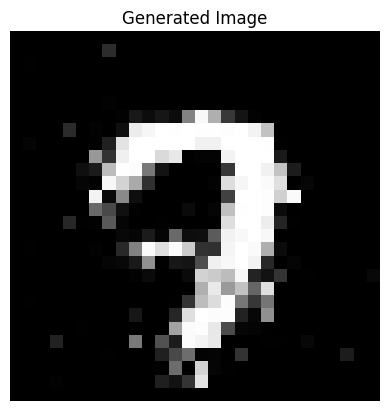

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Misalnya, ukuran input noise yang digunakan oleh Generator adalah 100
noise = np.random.normal(0, 1, (1, 100))  # Membuat noise acak untuk satu gambar
generated_image = generator.predict(noise)  # Menghasilkan gambar dengan Generator

# Jika gambar berbentuk (28, 28, 1) seperti pada kasus MNIST, kita bisa reshape
generated_image = generated_image.reshape(28, 28)  # Sesuaikan dimensi jika perlu

# Menampilkan gambar dengan matplotlib
plt.imshow(generated_image, cmap='gray')
plt.title("Generated Image")
plt.axis('off')
plt.show()

## Menampilkan Visualisasi Hasil Generator (Beberapa Gambar dalam Grid)

1/1 [==============================] - 0s 25ms/step


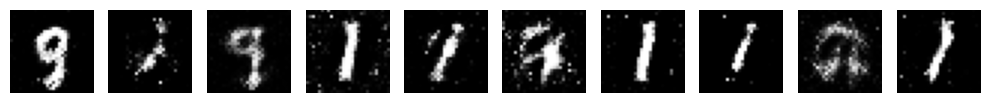

In [7]:
def plot_generated_images(generator, n_images=10, noise_dim=100):
    noise = np.random.normal(0, 1, (n_images, noise_dim))  # Membuat noise acak
    generated_images = generator.predict(noise)  # Hasilkan gambar
    
    # Menampilkan gambar dalam grid
    plt.figure(figsize=(10, 2))
    for i in range(n_images):
        plt.subplot(1, n_images, i+1)
        plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk menampilkan gambar
plot_generated_images(generator)

## Analisis Gambar

Berikur ini merupakan hasil analisa gambar-gambar yang dihasilkan oleh generator sebelum dimodifikasi:
<ul>
    <li> Gambar digit yang dihasilkan oleh Generator terlihat mulai menyerupai angka, tetapi masih memiliki kualitas yang rendah. </li>
    <li> Pola-pola angka terlihat kabur (blurry) dengan banyak noise di sekitar angka utama. </li>
    <li> Beberapa gambar menunjukkan bentuk angka seperti "9", "1", dan "2", tetapi tidak sepenuhnya jelas atau tajam. </li>
    <li> Generator berhasil mengidentifikasi pola awal untuk digit tertentu, meskipun hasilnya belum optimal. </li>
    <li> Struktur dasar angka sudah muncul, tetapi kurang detail dan terkesan seperti hasil interpolasi kasar. </li>
    <li> Terdapat banyak noise di latar belakang, yang menyebabkan angka terlihat kurang fokus. </li>
    <li> Kurangnya Kualitas Resolusi: Gambar terlihat memiliki resolusi yang rendah tanpa ketajaman pada tepi angka. </li>
    <li> Beberapa angka terlihat mirip satu sama lain, yang menunjukkan bahwa Generator mungkin belum belajar menghasilkan variasi digit yang cukup. </li>
    <li> Model Generator kemungkinan terlalu sederhana untuk menghasilkan gambar yang berkualitas tinggi. </li>
    <li> Parameter pelatihan seperti learning rate, jumlah epoch, atau optimizer yang digunakan mungkin belum optimal. </li>
    <li> Discriminator mungkin belum cukup kuat untuk memberikan feedback yang baik kepada Generator selama pelatihan. </li>
    <li> Model Generator sebelum modifikasi sudah mampu menghasilkan pola dasar digit angka, tetapi kualitas gambar yang dihasilkan masih jauh dari optimal. Masalah seperti noise yang dominan, resolusi rendah, dan kurangnya variasi digit menunjukkan bahwa arsitektur model, parameter pelatihan, atau kapasitas model perlu ditingkatkan. Hal ini penting agar Generator dapat menghasilkan gambar yang lebih jelas, tajam, dan menyerupai data asli (digit MNIST). </li>
    <li> Modifikasi pada arsitektur Generator, Discriminator, serta parameter pelatihan akan menjadi langkah penting untuk meningkatkan kualitas output yang dihasilkan. </li>
</ul>

# Mengubah Arsitektur Model dan Parameter Pelatihan

## Mengubah Arsitektur Generator

Tujuan:
<ul>
    <li> Menambahkan layer Conv2DTranspose untuk meningkatkan resolusi gambar. </li>
    <li> Menggunakan LeakyReLU untuk aktivasi non-linearitas yang stabil. </li>
    <li> Menambahkan BatchNormalization untuk membantu stabilitas pelatihan dan mempercepat konvergensi. </li>
</ul>

In [12]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization

def build_generator_v2():
    model = Sequential()
    model.add(Dense(7 * 7 * 256, input_dim=100))  # Lapisan awal untuk menghasilkan fitur
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7, 7, 256)))  # Mengubah menjadi bentuk 3D

    model.add(Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())

    model.add(Conv2DTranspose(64, kernel_size=3, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())

    model.add(Conv2DTranspose(1, kernel_size=3, activation='tanh', padding='same'))  # Gambar akhir
    return model

# Inisialisasi generator versi baru
generator_v2 = build_generator_v2()

## Mengubah Arsitektur Discriminator

Tujuan:
<ul>
    <li> Menambahkan layer Conv2D untuk membantu model memahami fitur gambar secara lokal. </li>
    <li> Menambahkan Dropout untuk mencegah overfitting. </li>
</ul>

In [13]:
from tensorflow.keras.layers import Dropout

def build_discriminator_v2():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, strides=2, input_shape=(28, 28, 1), padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

# Inisialisasi discriminator versi baru
discriminator_v2 = build_discriminator_v2()
discriminator_v2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

## Model GAN yang Baru

Untuk menyesuaikan arsitektur generator dan discriminator yang baru (sudah dimodifikasi) <br>
Tujuan menggunakan learning rate 0.0002 dan beta_1=0.5 pada optimizer Adam adalah untuk mengatasi ketidakstabilan pelatihan pada model GAN yang baru.

In [14]:
discriminator_v2.trainable = False
gan_input_v2 = Input(shape=(100,))
generated_image_v2 = generator_v2(gan_input_v2)
gan_output_v2 = discriminator_v2(generated_image_v2)

gan_v2 = Model(gan_input_v2, gan_output_v2)
gan_v2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
               loss='binary_crossentropy')

## Fungsi Pelatihan Model GAN yang Baru

Untuk menyesuaikan arsitektur generator, discriminator, dan model GAN yang baru (sudah dimodifikasi) <br>
Jumlah epochs tetap sama 10000 dengan tujuan membandingkannya dengan model GAN sebelum dimodifikasi meski jumlah epoch tetap sama, apakah hasilnya tetap sama, lebih baik, atau sebaliknya.

In [15]:
def train_gan_v2(gan, generator, discriminator, data, epochs=10000, batch_size=128):
    for epoch in range(epochs):
        noise = np.random.normal(0, 1, (batch_size, 100))
        generated_images = generator.predict(noise)

        idx = np.random.randint(0, data.shape[0], batch_size)
        real_images = data[idx]

        # Label
        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))

        # Train discriminator
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(generated_images, fake_labels)

        # Train generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, real_labels)

        if epoch % 1000 == 0:
            print("iterasi epoch % 1000 == 0 ke-", epoch)
            print(f"Epoch: {epoch}, D Loss: {d_loss_real[0] + d_loss_fake[0]}, G Loss: {g_loss}")

# Melatih model dengan versi baru
train_gan_v2(gan_v2, generator_v2, discriminator_v2, x_train)

4/4 [==============================] - 0s 64ms/step
iterasi epoch % 1000 == 0 ke- 0
Epoch: 0, D Loss: 1.4135424494743347, G Loss: 0.6605480909347534
4/4 [==============================] - 0s 100ms/step


4/4 [==============================] - 0s 100ms/step


4/4 [==============================] - 0s 103ms/step


4/4 [==============================] - 0s 99ms/step


4/4 [==============================] - 0s 53ms/step


4/4 [==============================] - 0s 37ms/step


4/4 [==============================] - 0s 78ms/step
iterasi epoch % 1000 == 0 ke- 1000
Epoch: 1000, D Loss: 1.5070613622665405, G Loss: 0.7834910750389099
4/4 [==============================] - 0s 63ms/step


4/4 [==============================] - 0s 37ms/step


4/4 [==============================] - 0s 45ms/step


4/4 [==============================] - 0s 89ms/step


4/4 [==============================] - 0s 80ms/step


4/4 [==============================] - 0s 99ms/step


4/4 [==============================] - 0s 77ms/step
iterasi epoch % 1000 == 0 ke- 2000
Epoch: 2000, D Loss: 1.4120421409606934, G Loss: 0.7615185976028442
4/4 [==============================] - 0s 89ms/step


4/4 [==============================] - 0s 48ms/step


4/4 [==============================] - 0s 94ms/step


4/4 [==============================] - 0s 89ms/step


4/4 [==============================] - 0s 68ms/step


4/4 [==============================] - 0s 94ms/step


4/4 [==============================] - 0s 89ms/step


4/4 [==============================] - 0s 64ms/step
iterasi epoch % 1000 == 0 ke- 3000
Epoch: 3000, D Loss: 1.390805721282959, G Loss: 0.7196277379989624
4/4 [==============================] - 0s 58ms/step


4/4 [==============================] - 0s 90ms/step


4/4 [==============================] - 0s 94ms/step


4/4 [==============================] - 0s 95ms/step


4/4 [==============================] - 0s 63ms/step


4/4 [==============================] - 0s 89ms/step


4/4 [==============================] - 0s 73ms/step
iterasi epoch % 1000 == 0 ke- 4000
Epoch: 4000, D Loss: 1.3971990942955017, G Loss: 0.7142595052719116
4/4 [==============================] - 0s 71ms/step


4/4 [==============================] - 0s 95ms/step


4/4 [==============================] - 0s 104ms/step


4/4 [==============================] - 0s 79ms/step


4/4 [==============================] - 0s 100ms/step


4/4 [==============================] - 0s 102ms/step


4/4 [==============================] - 0s 94ms/step


4/4 [==============================] - 0s 77ms/step
iterasi epoch % 1000 == 0 ke- 5000
Epoch: 5000, D Loss: 1.3879414796829224, G Loss: 0.6976286768913269
4/4 [==============================] - 0s 99ms/step


4/4 [==============================] - 0s 84ms/step


4/4 [==============================] - 0s 108ms/step


4/4 [==============================] - 0s 71ms/step


4/4 [==============================] - 0s 103ms/step


4/4 [==============================] - 0s 111ms/step


4/4 [==============================] - 0s 111ms/step
iterasi epoch % 1000 == 0 ke- 6000
Epoch: 6000, D Loss: 1.3822400569915771, G Loss: 0.7020490765571594
4/4 [==============================] - 0s 113ms/step


4/4 [==============================] - 0s 89ms/step


4/4 [==============================] - 0s 92ms/step


4/4 [==============================] - 0s 116ms/step


4/4 [==============================] - 0s 121ms/step


4/4 [==============================] - 0s 117ms/step


4/4 [==============================] - 0s 100ms/step
iterasi epoch % 1000 == 0 ke- 7000
Epoch: 7000, D Loss: 1.3646318912506104, G Loss: 0.7451027631759644
4/4 [==============================] - 0s 126ms/step


4/4 [==============================] - 0s 85ms/step


4/4 [==============================] - 0s 94ms/step


4/4 [==============================] - 0s 101ms/step


4/4 [==============================] - 1s 139ms/step


4/4 [==============================] - 1s 158ms/step


4/4 [==============================] - 1s 138ms/step


4/4 [==============================] - 1s 127ms/step
iterasi epoch % 1000 == 0 ke- 8000
Epoch: 8000, D Loss: 1.3795611262321472, G Loss: 0.7030748128890991
4/4 [==============================] - 1s 162ms/step


4/4 [==============================] - 1s 158ms/step


4/4 [==============================] - 1s 127ms/step


4/4 [==============================] - 1s 146ms/step


4/4 [==============================] - 1s 150ms/step


4/4 [==============================] - 1s 150ms/step


4/4 [==============================] - 1s 165ms/step
iterasi epoch % 1000 == 0 ke- 9000
Epoch: 9000, D Loss: 1.387455701828003, G Loss: 0.7117259502410889
4/4 [==============================] - 1s 170ms/step


4/4 [==============================] - 1s 162ms/step


4/4 [==============================] - 1s 135ms/step


4/4 [==============================] - 1s 118ms/step


4/4 [==============================] - 1s 149ms/step


4/4 [==============================] - 1s 144ms/step


4/4 [==============================] - 1s 152ms/step


4/4 [==============================] - 1s 143ms/step


## Menampilkan Visualisasi Hasil Generator Baru (1 Gambar)

1/1 [==============================] - 0s 284ms/step


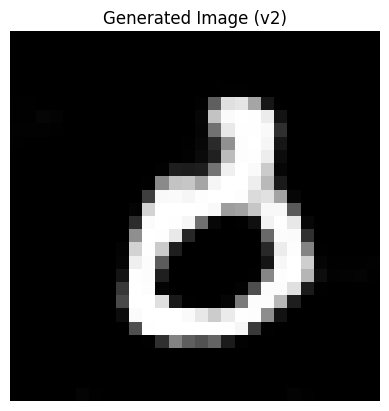

In [16]:
# Membuat noise acak untuk generator versi baru
noise_v2 = np.random.normal(0, 1, (1, 100))  # Noise input untuk satu gambar
generated_image_v2 = generator_v2.predict(noise_v2)  # Menghasilkan gambar dengan generator_v2

# Reshape gambar untuk tampilan jika berbentuk (28, 28, 1)
generated_image_v2 = generated_image_v2.reshape(28, 28)

# Menampilkan gambar menggunakan matplotlib
plt.imshow(generated_image_v2, cmap='gray')
plt.title("Generated Image (v2)")
plt.axis('off')
plt.show()

## Menampilkan Visualisasi Hasil Generator Baru (Beberapa Gambar dalam Grid)

1/1 [==============================] - 0s 114ms/step


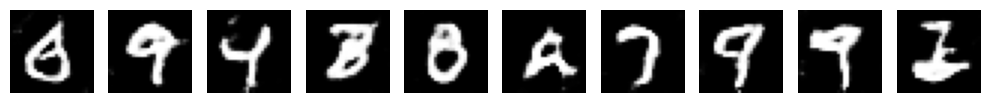

In [17]:
def plot_generated_images_v2(generator, n_images=10, noise_dim=100):
    # Membuat noise acak
    noise_v2 = np.random.normal(0, 1, (n_images, noise_dim))
    generated_images_v2 = generator.predict(noise_v2)  # Hasilkan gambar dengan generator_v2

    # Menampilkan gambar dalam grid
    plt.figure(figsize=(10, 2))
    for i in range(n_images):
        plt.subplot(1, n_images, i + 1)
        plt.imshow(generated_images_v2[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk menampilkan gambar hasil generator_v2
plot_generated_images_v2(generator_v2)

## Analisis Gambar

Tujuan semua langkah-langkah tersebut diambil dalam memodifikasi:
<ul>
    <li> Conv2DTranspose dan Conv2D dipilih karena mereka sangat efektif dalam memproses data gambar untuk menghasilkan struktur yang jelas. </li>
    <li> Learning Rate dan Beta_1 disesuaikan berdasarkan praktik umum dalam pelatihan GAN agar tidak terlalu cepat atau lambat belajar. </li>
</ul>

Berikut ini merupakan hasil analisa gambar-gambar yang dihasilkan oleh generator setelah dimodifikasi:
<ul>
    <li> Setelah modifikasi arsitektur Generator dan Discriminator, gambar yang dihasilkan lebih jelas dibandingkan sebelum modifikasi. Pola digit dari dataset MNIST tampak lebih terstruktur dengan bentuk angka yang dikenali, seperti 8, 9, dan lainnya. Hal ini menunjukkan bahwa Generator telah belajar merepresentasikan pola data lebih baik. </li>
    <li> Dengan menggunakan kombinasi parameter baru, seperti learning rate 0.0002 dan beta_1=0.5 pada optimizer Adam, pelatihan menjadi lebih stabil. Model GAN cenderung menghasilkan output yang lebih realistis dibandingkan sebelumnya, di mana sebelumnya menghasilkan noise. </li>
    <li> Modifikasi pada Generator, termasuk menambahkan layer Conv2DTranspose dan normalisasi batch, membantu menghasilkan output dengan detail yang lebih baik. Sedangkan pada Discriminator, penggunaan Conv2D meningkatkan kemampuan untuk mengenali pola digit lebih akurat. </li>
</ul>